# DATASET IRIS

In [1]:
# SUPERVISED LEARNING

# import
# load
# analyse
# (features)X AND (labels)Y
# split train and test
# choose model: classifier or regressor
# trainning model with data train
# predict
# calculate accuracy (accuracy_score)
# plot

In [3]:
# import

from itertools import product, combinations, permutations
import random
import math

from sklearn import datasets
import numpy as np
import pandas as pd
from scipy import stats

from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [4]:
# views

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)
sns.set(style="ticks")

### Load dataset

In [5]:
iris = datasets.load_iris()

In [6]:
type(iris)

sklearn.utils.Bunch

### Converte um dataset para dataframe

In [7]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris.target_names[iris.target]], 
                       columns= iris['feature_names'] + ['class'])

In [8]:
# todas colunas sao objects
iris_df.dtypes

sepal length (cm)    object
sepal width (cm)     object
petal length (cm)    object
petal width (cm)     object
class                object
dtype: object

In [9]:
# veja as o numero de linhas e colunas
iris_df.shape

(150, 5)

In [10]:
# veja o cabeçalho e 4 linhas
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
iris_df.dtypes

sepal length (cm)    object
sepal width (cm)     object
petal length (cm)    object
petal width (cm)     object
class                object
dtype: object

In [15]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null object
sepal width (cm)     150 non-null object
petal length (cm)    150 non-null object
petal width (cm)     150 non-null object
class                150 non-null object
dtypes: object(5)
memory usage: 5.9+ KB


In [14]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150,150,150,150,150
unique,35,23,43,22,3
top,5.0,3.0,1.5,0.2,setosa
freq,10,26,14,28,50


### Transformação dos tipos das colunas

In [82]:
for col in iris['feature_names']:
    iris_df[col] = pd.to_numeric(iris_df[col])

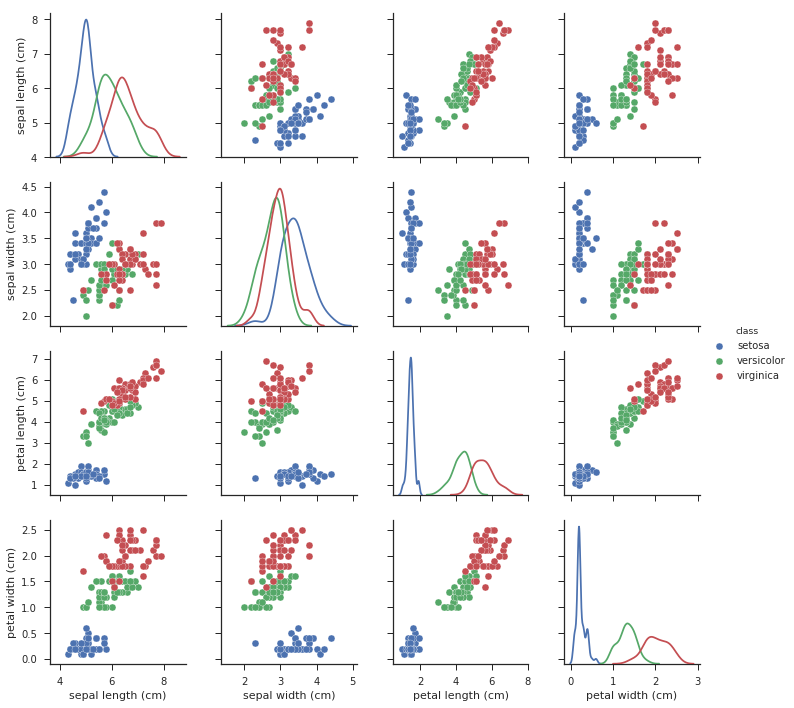

In [84]:
sns.pairplot(iris_df, hue="class", diag_kind="kde")
plt.show()

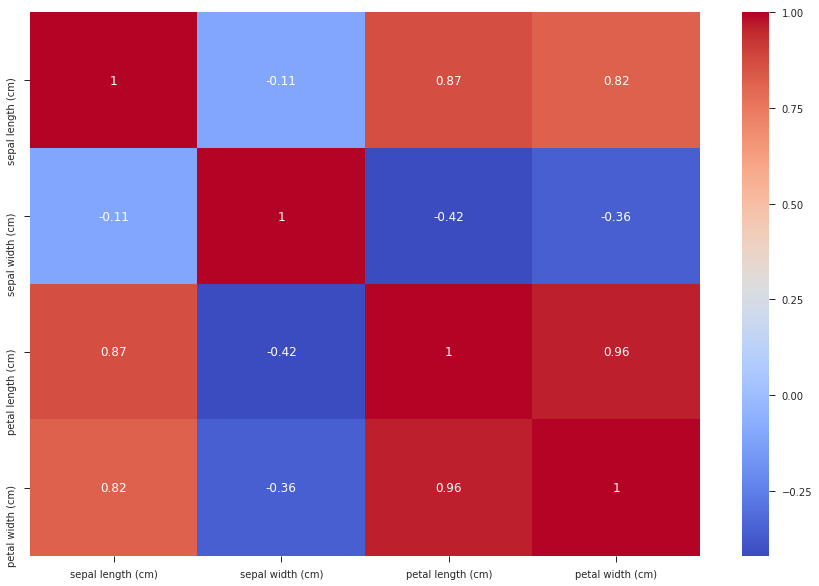

In [99]:
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [85]:
# Split dados de treinamento e validadção
X, y = iris.data, iris.target
# usando 20% dos dados para treinamento
validation_size = 0.2
# seed garante sempre o mesmo corte 
seed = 13
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

### Treinamento de classificadores

In [94]:
#treinamento de classificadores

def evaluate_classifiers(models, X_train, y_train, X_validation, y_validation):
    results = []
    # percorre um dicionário de modelos e já faz o treinamento + predicao + medição de acurácia
    for name in models.keys():
        model = models[name]
        model.fit(X_train, y_train)
        predictions = model.predict(X_validation)
        acc = accuracy_score(y_validation, predictions)
        cm = confusion_matrix(y_validation, predictions)
        report = classification_report(y_validation, predictions)
        results.append((name, acc, cm, report))
    return results

### Imprimi cada resultado

In [122]:
# imprimi cada resultado

def report_classifiers_results(model_results, metrics=['acc', 'cm', 'report']):
    for result in model_results:
        name, acc, cm, report = result
        print("Model: %s" % name)
        print("Accuracy: %f" % acc)
        print("Confusion: \n%s" % cm)
        print("Model: %s" % name)
        print(report)
        print()

### Lista de modelos

In [109]:
# lista de modelos

models = {}
models['Logistic Regression'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['Decision Tree'] = DecisionTreeClassifier(random_state=13)
models['NB'] = GaussianNB()
models['SVC'] = SVC()

In [110]:
classifiers_results = evaluate_classifiers(models, X_train, y_train, X_validation, y_validation)

In [111]:
report_classifiers_results(classifiers_results)

Model: Logistic Regression
Accuracy: 0.966667
Confusion: 
[[ 9  0  0]
 [ 0  7  1]
 [ 0  0 13]]
Model: Logistic Regression
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       1.00      0.88      0.93         8
          2       0.93      1.00      0.96        13

avg / total       0.97      0.97      0.97        30


Model: LDA
Accuracy: 0.966667
Confusion: 
[[ 9  0  0]
 [ 0  8  0]
 [ 0  1 12]]
Model: LDA
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       0.89      1.00      0.94         8
          2       1.00      0.92      0.96        13

avg / total       0.97      0.97      0.97        30


Model: KNN
Accuracy: 0.900000
Confusion: 
[[ 9  0  0]
 [ 0  8  0]
 [ 0  3 10]]
Model: KNN
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       0.73      1.00      0.84         8


In [112]:

def plot_decision_boundaries(models, X, y, cols=3):
    
    fig = plt.figure(figsize=(15, 10))
    rows = math.ceil(len(models) / (cols * 1.0))
    gs = gridspec.GridSpec(rows, cols)
    grid = []
    for r in range(rows):
        for c in range(cols):
            grid.append((r,c))

    clf_list = models.values()
    labels = models.keys()
    
    for clf, label, grd in zip(clf_list, labels, grid):
        scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
        print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        clf.fit(X, y)
        ax = plt.subplot(gs[grd[0], grd[1]])
        fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
        plt.title(label)

    plt.show()

Accuracy: 0.74 (+/- 0.10) [Logistic Regression]
Accuracy: 0.79 (+/- 0.07) [LDA]
Accuracy: 0.79 (+/- 0.01) [KNN]
Accuracy: 0.67 (+/- 0.02) [Decision Tree]
Accuracy: 0.78 (+/- 0.05) [NB]
Accuracy: 0.81 (+/- 0.05) [SVC]


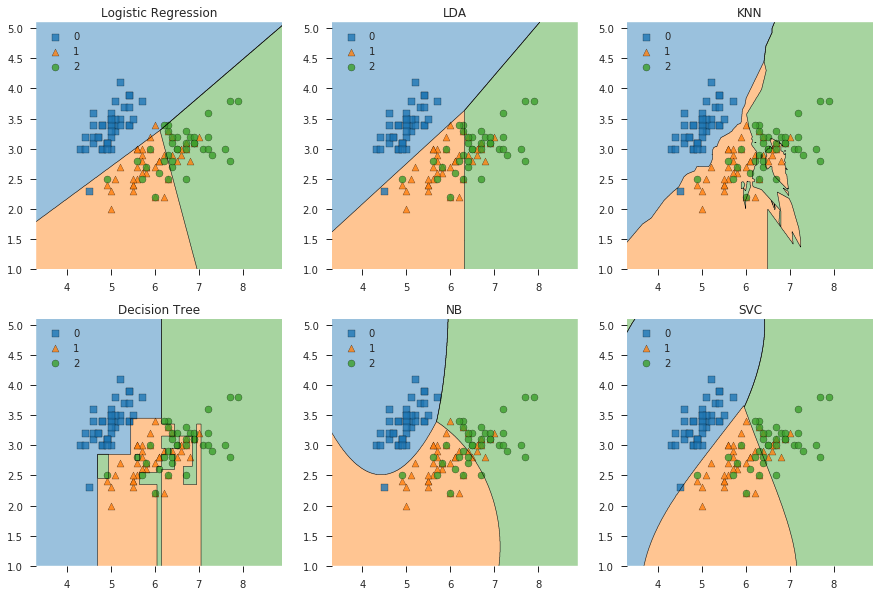

In [113]:
plot_decision_boundaries(models, X_train[:, [0,1]], y_train)

### Juntando em um bagging

* Votação em caso de classificadores
* Média no caso de regressores

In [116]:
bag_models = {name: models[name] for name in ['KNN','Decision Tree']}
bag_models['KNN_BAG'] = BaggingClassifier(base_estimator=models['KNN'], n_estimators=10) 
bag_models['decision_tree_BAG'] = BaggingClassifier(base_estimator=models['Decision Tree'], n_estimators=10) 

Accuracy: 0.79 (+/- 0.01) [KNN]
Accuracy: 0.67 (+/- 0.02) [Decision Tree]
Accuracy: 0.76 (+/- 0.02) [KNN_BAG]
Accuracy: 0.72 (+/- 0.01) [decision_tree_BAG]


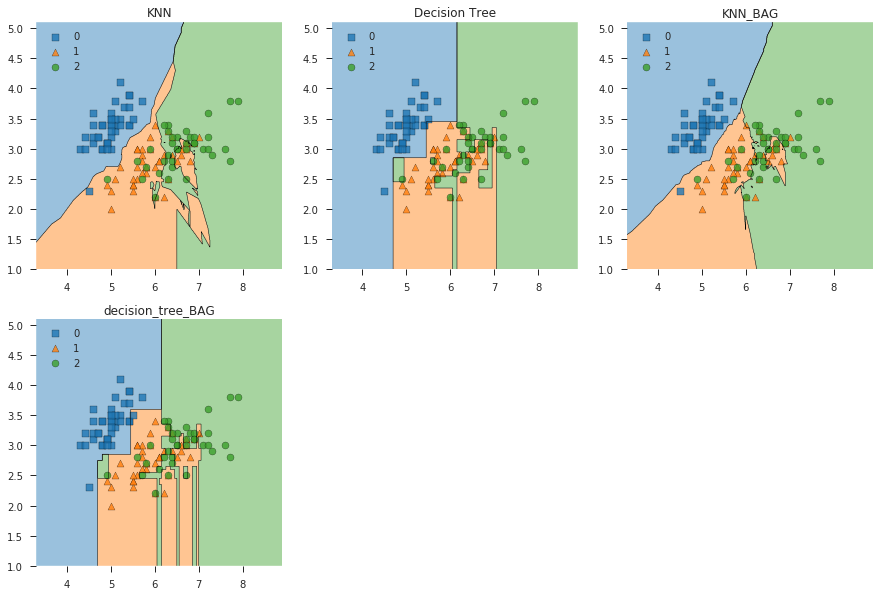

In [118]:
plot_decision_boundaries(bag_models, X_train[:, [0,1]], y_train)

* O KNN piorou num bagging 
* A decision tree ficou igual num bagging